In [2]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#data

##real data
real_df = pd.read_csv('real_u2r.csv')

##synthetic data
syn_df = pd.read_csv('syn_u2r.csv')

In [5]:
print(real_df.shape)
real_df.head()

(52, 12)


,logged_in,count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,level,service_domain_u,service_ecr_i,service_http,service_smtp,flag_S1,attack_class_u2r
0,1,0.001957,0.02,0.0,0,0.047619,0,0,0,0,0,1
1,1,0.001957,1.00,1.0,0,0.428571,0,0,0,0,0,1
2,1,0.003914,1.00,1.0,0,0.571429,0,0,0,0,0,1
3,1,0.001957,1.00,0.5,0,0.095238,0,0,0,0,0,1
4,1,0.001957,0.01,0.0,0,0.000000,0,0,0,0,0,1


In [6]:
print(syn_df.shape)
syn_df.head()

(500, 12)


,logged_in,count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,level,service_domain_u,service_ecr_i,service_http,service_smtp,flag_S1,attack_class_u2r
0,0.996678,-0.041755,-0.035535,-0.029431,-0.049267,0.351636,-0.008707,0.010917,0.004434,-0.003064,-0.006844,0.999989
1,0.999259,0.161657,0.993825,0.100483,-0.014964,0.081005,0.005622,0.015079,-0.000681,-0.008135,-0.007008,0.999905
2,0.998461,0.052482,0.992930,0.219774,-0.001568,0.096896,0.000231,0.006243,0.002970,-0.006068,-0.006264,0.999867
3,0.749740,-0.001185,0.997713,0.991582,-0.007099,0.098972,-0.001341,0.006386,-0.007369,0.006858,0.000295,0.999951
4,0.998629,0.007755,0.999545,0.305539,0.008424,0.107616,-0.021750,-0.012145,0.005023,-0.003599,-0.006751,0.999828


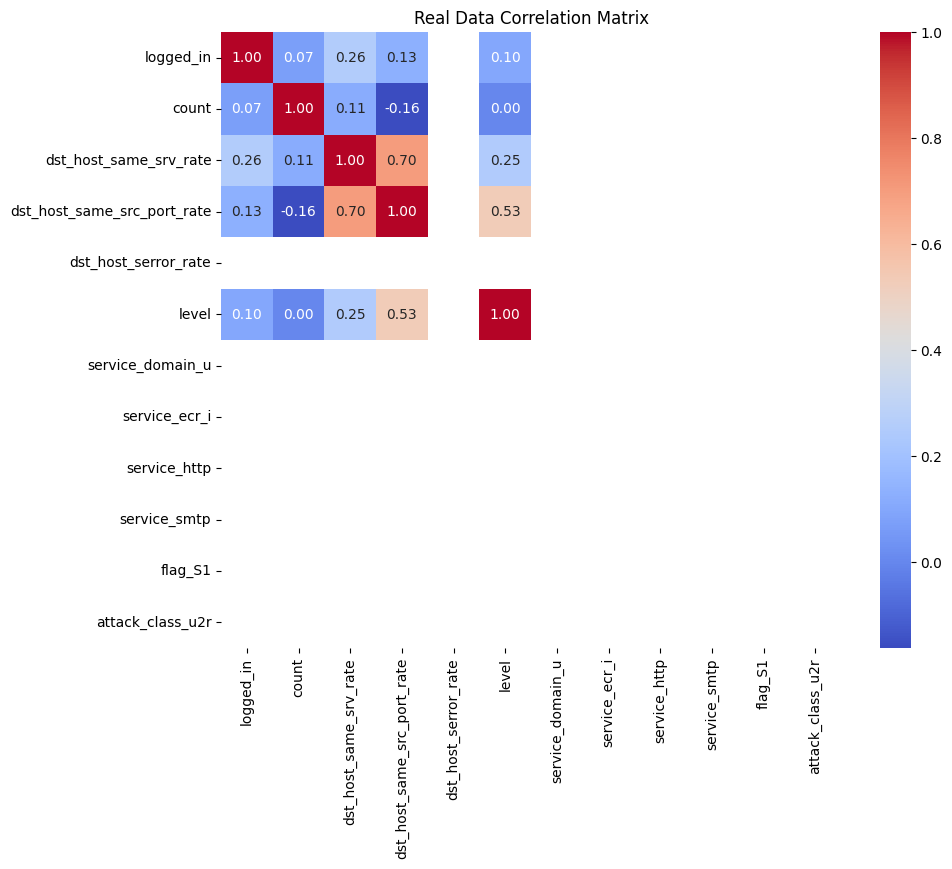

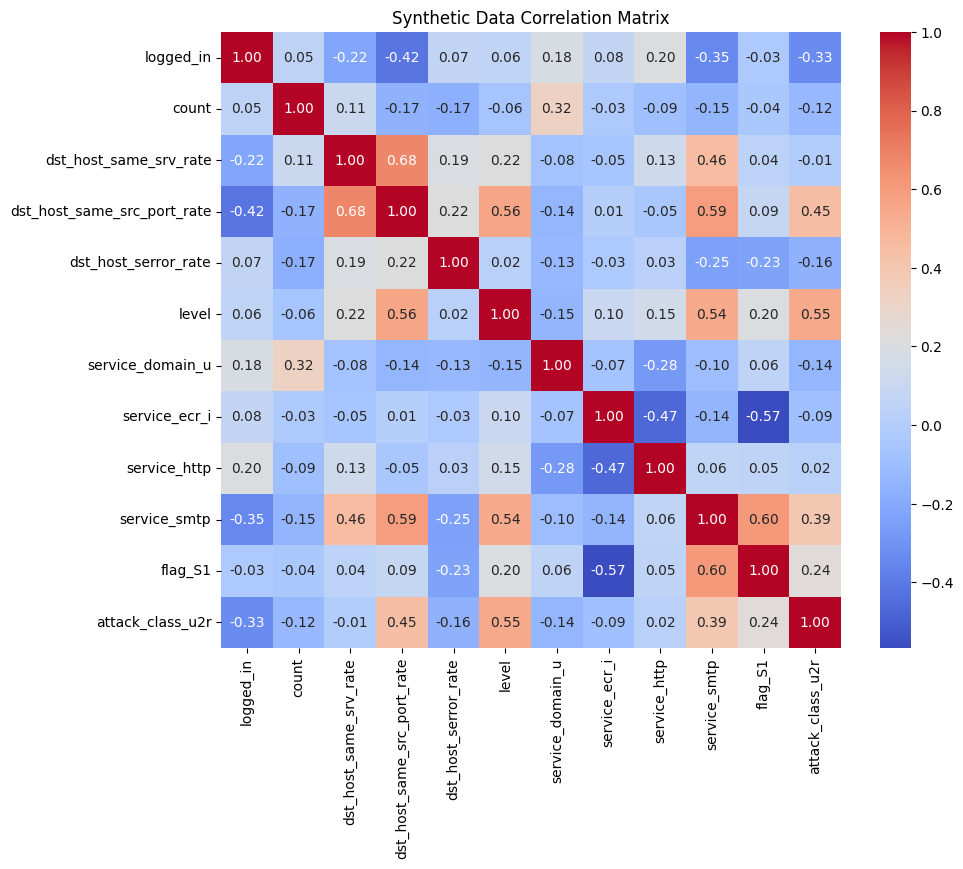

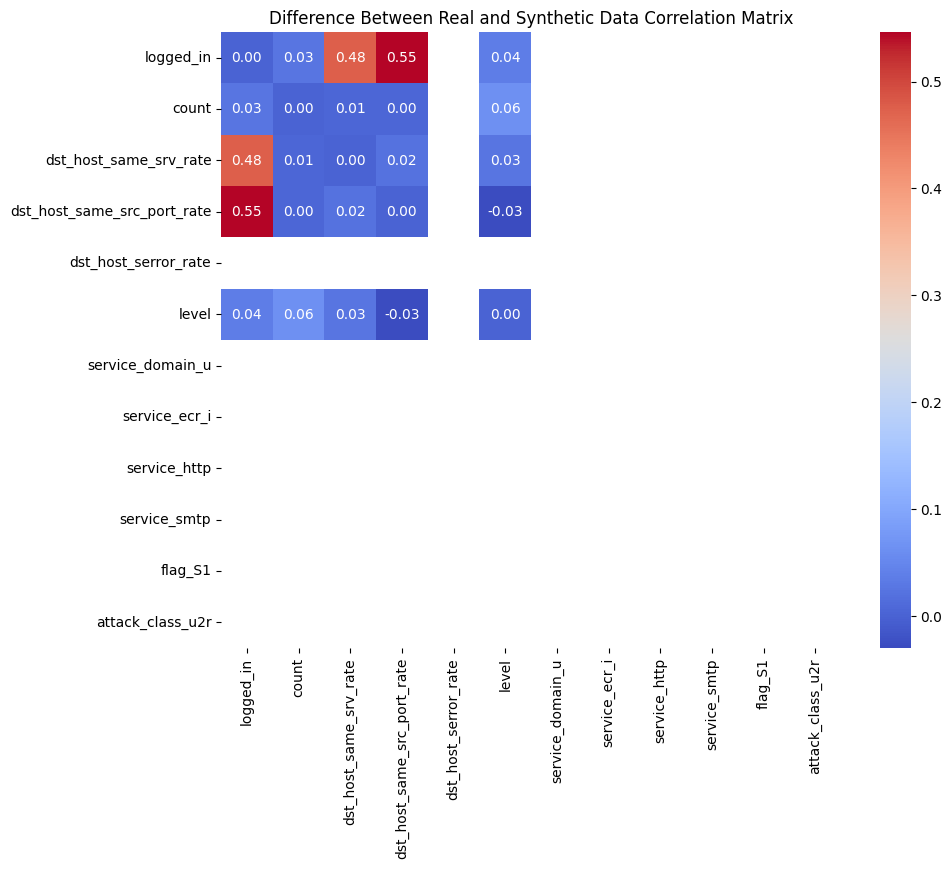

In [11]:
# Calculate correlation matrices
real_corr = real_df.corr()
syn_corr = syn_df.corr()
diff_corr = real_corr - syn_corr

# Plotting the correlation matrix for real data
plt.figure(figsize=(10, 8))
sns.heatmap(real_corr, annot=True, cmap='coolwarm', fmt='.2f')  # fmt='.2f' formats annotations to two decimal places
plt.title('Real Data Correlation Matrix')
plt.show()

# Plotting the correlation matrix for synthetic data
plt.figure(figsize=(10, 8))
sns.heatmap(syn_corr, annot=True, cmap='coolwarm', fmt='.2f')  # fmt='.2f' formats annotations to two decimal places
plt.title('Synthetic Data Correlation Matrix')
plt.show()

# Plotting the difference between the correlation matrices
plt.figure(figsize=(10, 8))
sns.heatmap(diff_corr, annot=True, cmap='coolwarm', fmt='.2f')  # fmt='.2f' formats annotations to two decimal places
plt.title('Difference Between Real and Synthetic Data Correlation Matrix')
plt.show()


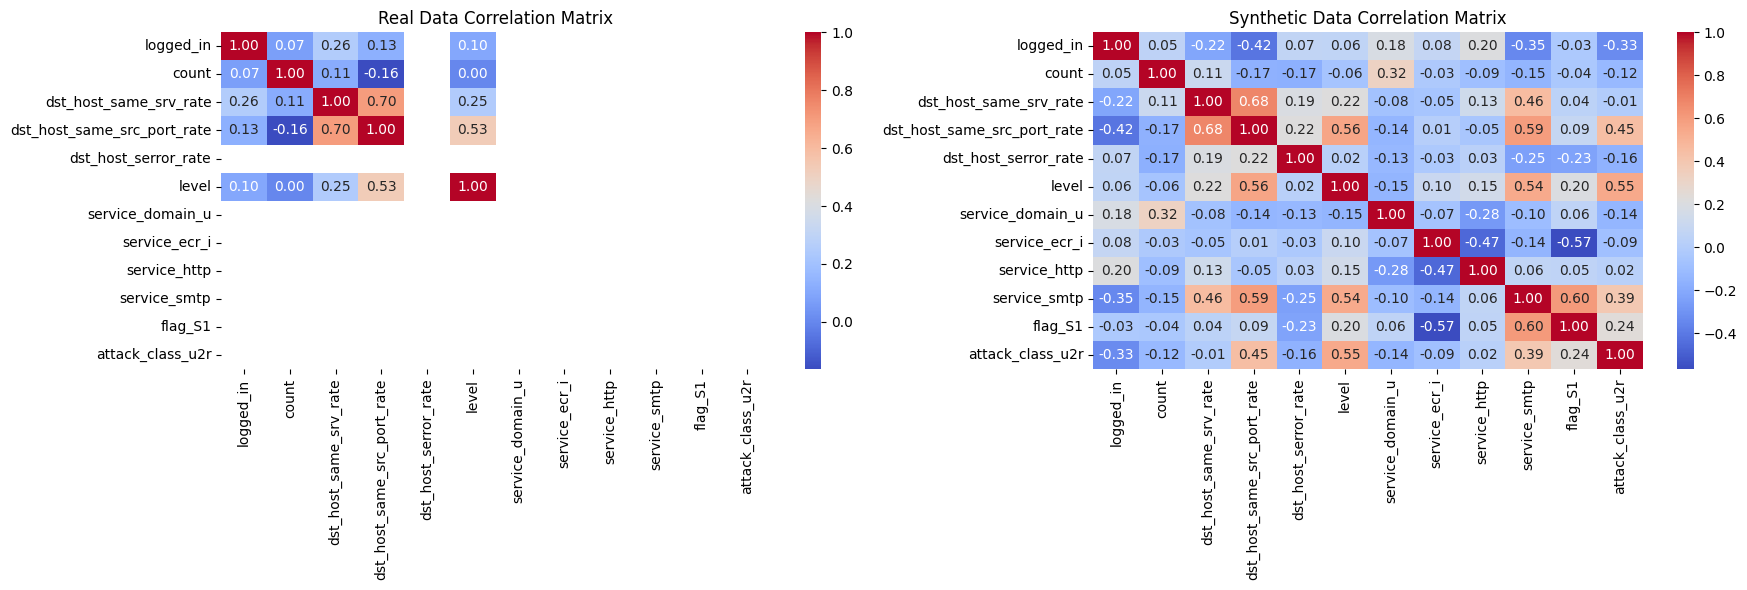

In [13]:
# Calculate correlation matrices
real_corr = real_df.corr()
syn_corr = syn_df.corr()
diff_corr = real_corr - syn_corr

# Set up subplots for side-by-side arrangement
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plotting the correlation matrix for real data
sns.heatmap(real_corr, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[0])
axs[0].set_title('Real Data Correlation Matrix')

# Plotting the correlation matrix for synthetic data
sns.heatmap(syn_corr, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[1])
axs[1].set_title('Synthetic Data Correlation Matrix')



# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [14]:
import scipy.stats as stats

# Assuming 'real_df' and 'syn_df' are your real and synthetic datasets

# Get the number of columns (variables) in your dataset
num_variables = len(real_df.columns)

# Loop through each pair of variables and perform correlation significance test
for i in range(num_variables):
    for j in range(i+1, num_variables):  # Avoid self-comparison and redundant pairs
        # Calculate Pearson correlation coefficient for real and synthetic data
        corr_real, _ = stats.pearsonr(real_df.iloc[:, i], real_df.iloc[:, j])
        corr_syn, _ = stats.pearsonr(syn_df.iloc[:, i], syn_df.iloc[:, j])
        
        # Perform significance test for correlation coefficients
        _, p_value = stats.pearsonr(real_df.iloc[:, i], real_df.iloc[:, j])  # Use real data for significance test
        significance = "Significant" if p_value < 0.05 else "Not Significant"
        
        # Print results for each variable pair
        print(f"Variables {real_df.columns[i]} and {real_df.columns[j]}:")
        print(f"Real Data Correlation: {corr_real:.3f}")
        print(f"Synthetic Data Correlation: {corr_syn:.3f}")
        print(f"Significance: {significance}")
        print("-----------------------------")


Variables logged_in and count:
Real Data Correlation: 0.072
Synthetic Data Correlation: 0.046
Significance: Not Significant
-----------------------------
Variables logged_in and dst_host_same_srv_rate:
Real Data Correlation: 0.255
Synthetic Data Correlation: -0.221
Significance: Not Significant
-----------------------------
Variables logged_in and dst_host_same_src_port_rate:
Real Data Correlation: 0.129
Synthetic Data Correlation: -0.418
Significance: Not Significant
-----------------------------
Variables logged_in and dst_host_serror_rate:
Real Data Correlation: nan
Synthetic Data Correlation: 0.069
Significance: Not Significant
-----------------------------
Variables logged_in and level:
Real Data Correlation: 0.099
Synthetic Data Correlation: 0.062
Significance: Not Significant
-----------------------------
Variables logged_in and service_domain_u:
Real Data Correlation: nan
Synthetic Data Correlation: 0.185
Significance: Not Significant
-----------------------------
Variables log

c:\Users\daf\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


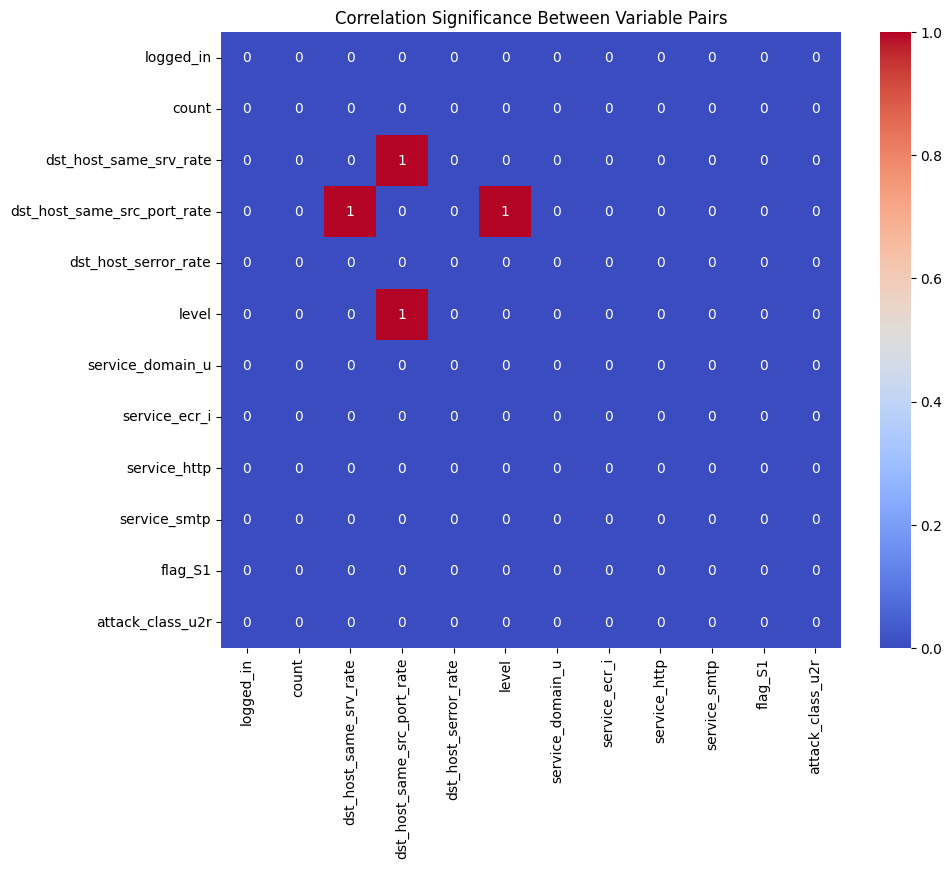

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create an empty DataFrame to store the significance results
num_variables = len(real_df.columns)
significance_matrix = pd.DataFrame(np.zeros((num_variables, num_variables)), columns=real_df.columns, index=real_df.columns)

# Loop through each pair of variables and perform correlation significance test
for i in range(num_variables):
    for j in range(i+1, num_variables):  # Avoid self-comparison and redundant pairs
        _, p_value = stats.pearsonr(real_df.iloc[:, i], real_df.iloc[:, j])  # Use real data for significance test
        significance = 1 if p_value < 0.05 else 0  # Assign 1 if significant, else 0
        significance_matrix.iloc[i, j] = significance
        significance_matrix.iloc[j, i] = significance  # Symmetrically assign the value to the mirrored position

# Plotting the significance matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(significance_matrix, annot=True, cmap='coolwarm', fmt='.0f')  # Display 1/0 values with no decimal places
plt.title('Correlation Significance Between Variable Pairs')
plt.show()


In [16]:
from scipy.stats import norm

# Iterate through each pair of variables in the correlation matrices
num_variables = len(real_corr.columns)

for i in range(num_variables):
    for j in range(i+1, num_variables):  # Avoid self-comparison and redundant pairs
        # Get correlation coefficients for the pair from real and synthetic data
        real_corr_coef = real_corr.iloc[i, j]
        synthetic_corr_coef = syn_corr.iloc[i, j]
        
        # Apply Fisher transformation to correlation coefficients
        z_real = np.arctanh(real_corr_coef)
        z_synthetic = np.arctanh(synthetic_corr_coef)
        
        # Calculate standard errors of the z-transformed correlations
        n = len(real_df)  # Replace with the length of your dataset
        se_real = 1 / np.sqrt(n - 3)  # For real dataset
        se_synthetic = 1 / np.sqrt(n - 3)  # For synthetic dataset
        
        # Calculate the difference in z-scores
        z_diff = z_real - z_synthetic
        
        # Calculate the pooled standard error
        pooled_se = np.sqrt(se_real**2 + se_synthetic**2)
        
        # Calculate the Z-test statistic
        z_test = z_diff / pooled_se
        
        # Calculate p-value using cumulative distribution function (CDF) of the standard normal distribution
        p_value = 2 * (1 - norm.cdf(abs(z_test)))  # Two-tailed test
        
        # Compare p-value to chosen significance level (e.g., 0.05)
        alpha = 0.05
        if p_value < alpha:
            print(f"Variables {real_corr.columns[i]} and {real_corr.columns[j]}:")
            print("The difference in correlation coefficients is significant.")
        else:
            print(f"Variables {real_corr.columns[i]} and {real_corr.columns[j]}:")
            print("The difference in correlation coefficients is not significant.")


Variables logged_in and count:
The difference in correlation coefficients is not significant.
Variables logged_in and dst_host_same_srv_rate:
The difference in correlation coefficients is significant.
Variables logged_in and dst_host_same_src_port_rate:
The difference in correlation coefficients is significant.
Variables logged_in and dst_host_serror_rate:
The difference in correlation coefficients is not significant.
Variables logged_in and level:
The difference in correlation coefficients is not significant.
Variables logged_in and service_domain_u:
The difference in correlation coefficients is not significant.
Variables logged_in and service_ecr_i:
The difference in correlation coefficients is not significant.
Variables logged_in and service_http:
The difference in correlation coefficients is not significant.
Variables logged_in and service_smtp:
The difference in correlation coefficients is not significant.
Variables logged_in and flag_S1:
The difference in correlation coefficients

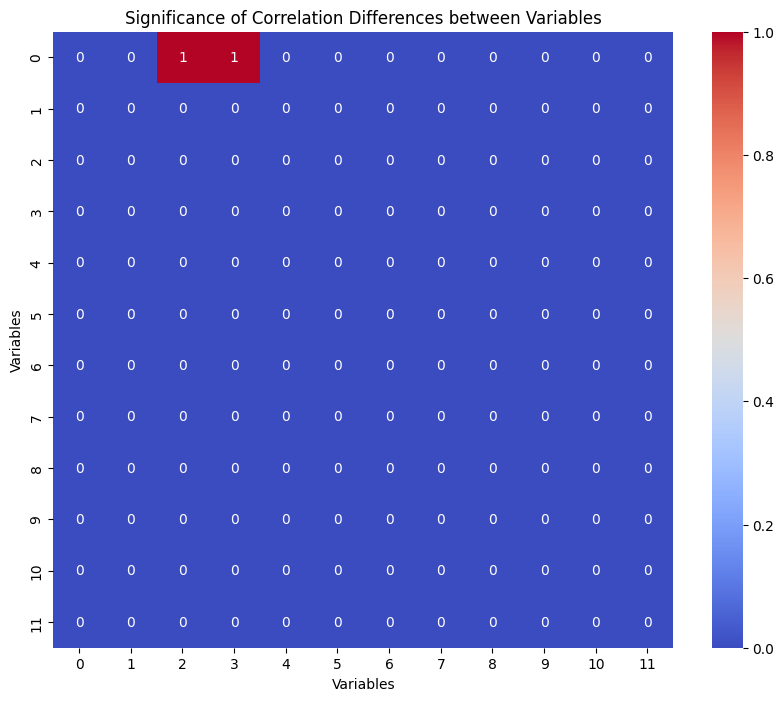

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Create an empty matrix to store the significance results
num_variables = len(real_corr.columns)
significance_matrix = np.zeros((num_variables, num_variables))

# Iterate through each pair of variables in the correlation matrices
for i in range(num_variables):
    for j in range(i+1, num_variables):  # Avoid self-comparison and redundant pairs
        # Get correlation coefficients for the pair from real and synthetic data
        real_corr_coef = real_corr.iloc[i, j]
        synthetic_corr_coef = syn_corr.iloc[i, j]
        
        # Apply Fisher transformation to correlation coefficients
        z_real = np.arctanh(real_corr_coef)
        z_synthetic = np.arctanh(synthetic_corr_coef)
        
        # Calculate standard errors of the z-transformed correlations
        n = len(real_df)  # Replace with the length of your dataset
        se_real = 1 / np.sqrt(n - 3)  # For real dataset
        se_synthetic = 1 / np.sqrt(n - 3)  # For synthetic dataset
        
        # Calculate the difference in z-scores
        z_diff = z_real - z_synthetic
        
        # Calculate the pooled standard error
        pooled_se = np.sqrt(se_real**2 + se_synthetic**2)
        
        # Calculate the Z-test statistic
        z_test = z_diff / pooled_se
        
        # Calculate p-value using cumulative distribution function (CDF) of the standard normal distribution
        p_value = 2 * (1 - norm.cdf(abs(z_test)))  # Two-tailed test
        
        # Store the result in the significance matrix (1 for significant, 0 for not significant)
        if p_value < 0.05:  # Adjust significance level as needed
            significance_matrix[i, j] = 1
        else:
            significance_matrix[i, j] = 0

# Create a heatmap to visualize the significance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(significance_matrix, annot=True, cmap='coolwarm', fmt='.0f')  # Display 1/0 values with no decimal places
plt.title('Significance of Correlation Differences between Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()
